In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

In [ ]:
PATH_FILE ="/content/drive/MyDrive/TheMasterData/week11-trend/bangkok-air-quality.csv"

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_raw=pd.read_csv(PATH_FILE, parse_dates=['date'], na_values=[' '], skipinitialspace=True)


In [ ]:
df_raw.head()

,date,pm25,pm10,o3,no2,so2,co
0,2023-02-01,182.0,89.0,58.0,26.0,2.0,NaN
1,2023-02-02,182.0,56.0,23.0,15.0,1.0,NaN
2,2023-02-03,121.0,39.0,22.0,9.0,1.0,NaN
3,2023-02-04,89.0,28.0,18.0,9.0,1.0,NaN
4,2023-02-05,72.0,26.0,13.0,10.0,1.0,NaN


In [ ]:
data=df_raw.sort_values('date').reset_index(drop=True).copy()
data

,date,pm25,pm10,o3,no2,so2,co
0,2013-12-31,NaN,NaN,68.0,33.0,3.0,7.0
1,2014-01-01,NaN,84.0,90.0,48.0,5.0,16.0
2,2014-01-02,NaN,84.0,119.0,63.0,7.0,14.0
3,2014-01-03,NaN,103.0,95.0,57.0,7.0,13.0
4,2014-01-04,NaN,101.0,52.0,34.0,1.0,NaN
...,...,...,...,...,...,...,...
3335,2023-02-24,159.0,69.0,26.0,14.0,NaN,NaN
3336,2023-02-25,138.0,62.0,33.0,8.0,NaN,NaN
3337,2023-02-26,110.0,66.0,34.0,10.0,1.0,NaN
3338,2023-02-27,127.0,75.0,3.0,16.0,1.0,NaN


In [ ]:
y_col='pm25'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3340 non-null   datetime64[ns]
 1   pm25    2396 non-null   float64       
 2   pm10    3325 non-null   float64       
 3   o3      3326 non-null   float64       
 4   no2     3326 non-null   float64       
 5   so2     2126 non-null   float64       
 6   co      963 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 182.8 KB


In [ ]:
data.dropna(subset=[y_col], inplace=True)
data=data.reset_index(drop=True)


df_trend = data.copy()
data

,date,pm25,pm10,o3,no2,so2,co
0,2016-07-30,61.0,19.0,17.0,15.0,8.0,6.0
1,2016-07-31,68.0,24.0,25.0,13.0,7.0,6.0
2,2016-08-01,60.0,20.0,26.0,14.0,2.0,6.0
3,2016-08-02,68.0,25.0,21.0,14.0,7.0,6.0
4,2016-08-03,70.0,26.0,23.0,16.0,2.0,6.0
...,...,...,...,...,...,...,...
2391,2023-02-24,159.0,69.0,26.0,14.0,NaN,NaN
2392,2023-02-25,138.0,62.0,33.0,8.0,NaN,NaN
2393,2023-02-26,110.0,66.0,34.0,10.0,1.0,NaN
2394,2023-02-27,127.0,75.0,3.0,16.0,1.0,NaN


In [ ]:
def date_parts(data, date_colname='date'):
    '''create year, month, day, dayname columns'''
    data['year']=data['date'].dt.year
    data['month']=data['date'].dt.month
    data['day']=data['date'].dt.day
    data['day_name']=data['date'].dt.day_name().astype('category')


In [ ]:
date_parts(data)

In [ ]:
data

,date,pm25,pm10,o3,no2,so2,co,year,month,day,day_name,month_name
0,2016-07-30,61.0,19.0,17.0,15.0,8.0,6.0,2016,7,30,Saturday,July
1,2016-07-31,68.0,24.0,25.0,13.0,7.0,6.0,2016,7,31,Sunday,July
2,2016-08-01,60.0,20.0,26.0,14.0,2.0,6.0,2016,8,1,Monday,August
3,2016-08-02,68.0,25.0,21.0,14.0,7.0,6.0,2016,8,2,Tuesday,August
4,2016-08-03,70.0,26.0,23.0,16.0,2.0,6.0,2016,8,3,Wednesday,August
...,...,...,...,...,...,...,...,...,...,...,...,...
2391,2023-02-24,159.0,69.0,26.0,14.0,NaN,NaN,2023,2,24,Friday,February
2392,2023-02-25,138.0,62.0,33.0,8.0,NaN,NaN,2023,2,25,Saturday,February
2393,2023-02-26,110.0,66.0,34.0,10.0,1.0,NaN,2023,2,26,Sunday,February
2394,2023-02-27,127.0,75.0,3.0,16.0,1.0,NaN,2023,2,27,Monday,February


In [ ]:
df=data[['date', 'year', 'month', 'day', 'day_name', y_col]]
df

,date,year,month,day,day_name,pm25
0,2016-07-30,2016,7,30,Saturday,61.0
1,2016-07-31,2016,7,31,Sunday,68.0
2,2016-08-01,2016,8,1,Monday,60.0
3,2016-08-02,2016,8,2,Tuesday,68.0
4,2016-08-03,2016,8,3,Wednesday,70.0
...,...,...,...,...,...,...
2391,2023-02-24,2023,2,24,Friday,159.0
2392,2023-02-25,2023,2,25,Saturday,138.0
2393,2023-02-26,2023,2,26,Sunday,110.0
2394,2023-02-27,2023,2,27,Monday,127.0


In [ ]:
df=df.set_index('date')
df

,year,month,day,day_name,pm25
date,,,,,
2016-07-30,2016,7,30,Saturday,61.0
2016-07-31,2016,7,31,Sunday,68.0
2016-08-01,2016,8,1,Monday,60.0
2016-08-02,2016,8,2,Tuesday,68.0
2016-08-03,2016,8,3,Wednesday,70.0
...,...,...,...,...,...
2023-02-24,2023,2,24,Friday,159.0
2023-02-25,2023,2,25,Saturday,138.0
2023-02-26,2023,2,26,Sunday,110.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2396 entries, 2016-07-30 to 2023-02-28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   year      2396 non-null   int64   
 1   month     2396 non-null   int64   
 2   day       2396 non-null   int64   
 3   day_name  2396 non-null   category
 4   pm25      2396 non-null   float64 
dtypes: category(1), float64(1), int64(3)
memory usage: 96.3 KB


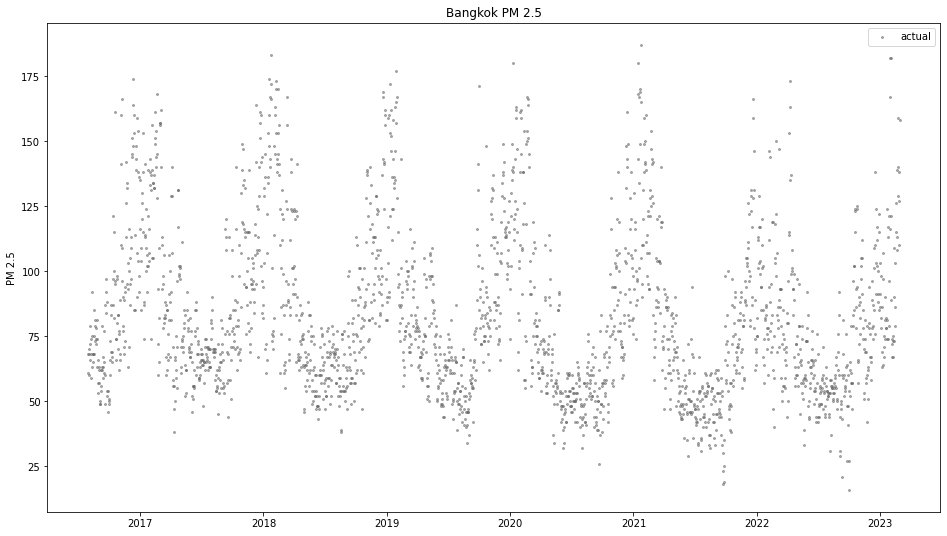

In [ ]:
plt.figure(figsize=(16, 9))
plt.scatter(df.index, df[y_col], alpha=.5, s=4, label='actual', color='.4')
#sns.scatterplot(data=df , x =df.index , y = y_col , hue = df.day_name)
plt.ylabel('PM 2.5')
plt.title('Bangkok PM 2.5')
plt.legend();

In [ ]:
!pip install -U lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.4 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [ ]:
feature_cols=[
    'year', 'month',
    'day',
    'day_name'
]
X=df[feature_cols]
y=df[y_col]

In [ ]:
split_at=1400
X_train, X_test, y_train, y_test=X[:split_at], X[split_at:], y[:split_at], y[split_at:]

In [ ]:
import lightgbm as lgb
print(f'lightgbm version = {lgb.__version__}')

lightgbm version = 3.3.5


In [ ]:
reg = lgb.LGBMRegressor()

In [ ]:
reg.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [ ]:
params={'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
}

In [ ]:
fit_params={'early_stopping_rounds':200,
            'eval_set': [(X_test, y_test)],
            'verbose': 10
           }
reg.fit(X_train, y_train, **fit_params)

[10]	valid_0's l2: 616.046
[20]	valid_0's l2: 591.301
[30]	valid_0's l2: 599.848
[40]	valid_0's l2: 609.566
[50]	valid_0's l2: 620.302
[60]	valid_0's l2: 622.528
[70]	valid_0's l2: 619.17
[80]	valid_0's l2: 615.138
[90]	valid_0's l2: 620.531
[100]	valid_0's l2: 621.102


/usr/local/lib/python3.8/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.8/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.8/dist-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.8/dist-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict i

LGBMRegressor()

In [ ]:
reg.__dict__

{'boosting_type': 'gbdt',
 'objective': None,
 'num_leaves': 31,
 'max_depth': -1,
 'learning_rate': 0.1,
 'n_estimators': 100,
 'subsample_for_bin': 200000,
 'min_split_gain': 0.0,
 'min_child_weight': 0.001,
 'min_child_samples': 20,
 'subsample': 1.0,
 'subsample_freq': 0,
 'colsample_bytree': 1.0,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'random_state': None,
 'n_jobs': -1,
 'silent': 'warn',
 'importance_type': 'split',
 '_Booster': <lightgbm.basic.Booster at 0x7f3474ff5af0>,
 '_evals_result': {'valid_0': OrderedDict([('l2',
                [932.0008351022299,
                 850.9085912536044,
                 789.449838215992,
                 743.1505691089867,
                 705.9417071824963,
                 677.3670957172585,
                 655.6896276420116,
                 640.6102652750553,
                 627.9998872013605,
                 616.0463811084575,
                 610.8657101141811,
                 608.3468281764067,
                 603.0085650538281

In [ ]:
reg.score(X_train, y_train)

0.629462506245256

In [ ]:
reg.score(X_test, y_test)

0.32243895121749666

In [ ]:
reg.predict(X_test[:5])

array([59.02119001, 58.96734056, 58.96734056, 58.51705103, 58.51705103])

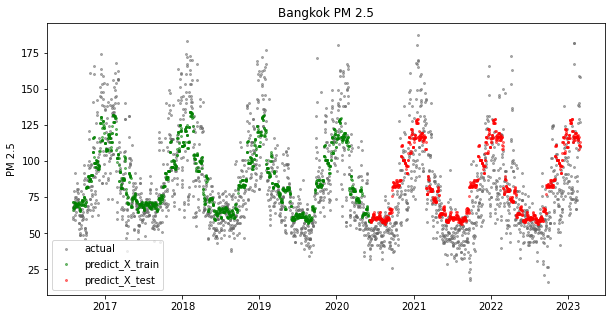

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(df.index, df[y_col], alpha=.5, s=4, label='actual', color='.4')
plt.scatter(X_train.index, reg.predict(X_train), alpha=.5, s=4, label='predict_X_train', color='green')
plt.scatter(X_test.index, reg.predict(X_test), alpha=.5, s=4, label='predict_X_test', color='red')
plt.ylabel('PM 2.5')
plt.title('Bangkok PM 2.5')
plt.legend();

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 8.9 MB/s eta 0:00:00


In [ ]:
import shap
# load JS visualization code to notebook
shap.initjs()

In [ ]:
X

,year,month,day,day_name
date,,,,
2016-07-30,2016,7,30,Saturday
2016-07-31,2016,7,31,Sunday
2016-08-01,2016,8,1,Monday
2016-08-02,2016,8,2,Tuesday
2016-08-03,2016,8,3,Wednesday
...,...,...,...,...
2023-02-24,2023,2,24,Friday
2023-02-25,2023,2,25,Saturday
2023-02-26,2023,2,26,Sunday


In [ ]:
X.tail

<bound method NDFrame.tail of             year  month  day   day_name
date                                   
2016-07-30  2016      7   30   Saturday
2016-07-31  2016      7   31     Sunday
2016-08-01  2016      8    1     Monday
2016-08-02  2016      8    2    Tuesday
2016-08-03  2016      8    3  Wednesday
...          ...    ...  ...        ...
2023-02-24  2023      2   24     Friday
2023-02-25  2023      2   25   Saturday
2023-02-26  2023      2   26     Sunday
2023-02-27  2023      2   27     Monday
2023-02-28  2023      2   28    Tuesday

[2396 rows x 4 columns]>

In [ ]:
X.loc[['2021-03-04']]

,year,month,day,day_name
date,,,,
2021-03-04,2021,3,4,Thursday


In [ ]:
Xi=pd.DataFrame([[2016,3,17,'Wednesday']])

In [ ]:
# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(reg)
# shap_values = explainer.shap_values(X.loc[['2021-03-04']])
# shap_values = explainer.shap_values(np.array([[2016,3,17,6]]))
shap_values = explainer.shap_values(X)

In [ ]:
shap_values

array([[  2.96707727, -19.15962185,   0.03333215,   0.20199595],
       [  2.929749  , -19.20985169,   0.36923018,   0.39791522],
       [  3.43338693, -22.20933558,  -2.06425941,  -0.44348761],
       ...,
       [  0.94566936,  25.34504525,  -3.32407445,   0.41919426],
       [  0.96581668,  25.44975899,  -3.6327142 ,   0.60297294],
       [  0.9456786 ,  26.8582535 ,  -2.80459491,   0.68344177]])

In [ ]:
explainer.__dict__

{'model': <shap.explainers._tree.TreeEnsemble at 0x7f33e3991d60>,
 'output_names': None,
 'feature_names': None,
 'masker': None,
 'link': CPUDispatcher(<function identity at 0x7f3472446280>),
 'linearize_link': True,
 'data': None,
 'data_missing': None,
 'feature_perturbation': 'tree_path_dependent',
 'expected_value': 87.29824746113059,
 'model_output': 'raw',
 'approximate': False}

In [ ]:
reg.predict(X_train).mean() # explainer.expected_value

87.2982474611306

In [ ]:
shap_values[:3]

array([[  2.96707727, -19.15962185,   0.03333215,   0.20199595],
       [  2.929749  , -19.20985169,   0.36923018,   0.39791522],
       [  3.43338693, -22.20933558,  -2.06425941,  -0.44348761]])

In [ ]:
shap_values.shape

(2396, 4)

In [ ]:
X[:5]

,year,month,day,day_name
date,,,,
2016-07-30,2016,7,30,Saturday
2016-07-31,2016,7,31,Sunday
2016-08-01,2016,8,1,Monday
2016-08-02,2016,8,2,Tuesday
2016-08-03,2016,8,3,Wednesday


In [ ]:
feature_cols

['year', 'month', 'day', 'day_name']

In [ ]:
# shap values of each case
dshap=pd.DataFrame(shap_values, columns=feature_cols)
dshap

,year,month,day,day_name
0,2.967077,-19.159622,0.033332,0.201996
1,2.929749,-19.209852,0.369230,0.397915
2,3.433387,-22.209336,-2.064259,-0.443488
3,3.500001,-21.800875,-1.903331,0.328020
4,3.500001,-21.719388,-1.903331,0.246534
...,...,...,...,...
2391,1.227286,25.242833,-1.013482,-1.317118
2392,0.989205,24.099218,-2.898026,-1.414011
2393,0.945669,25.345045,-3.324074,0.419194
2394,0.965817,25.449759,-3.632714,0.602973


In [ ]:
X[:5]

,year,month,day,day_name
date,,,,
2016-07-30,2016,7,30,Saturday
2016-07-31,2016,7,31,Sunday
2016-08-01,2016,8,1,Monday
2016-08-02,2016,8,2,Tuesday
2016-08-03,2016,8,3,Wednesday


In [ ]:
X.tail()

,year,month,day,day_name
date,,,,
2023-02-24,2023,2,24,Friday
2023-02-25,2023,2,25,Saturday
2023-02-26,2023,2,26,Sunday
2023-02-27,2023,2,27,Monday
2023-02-28,2023,2,28,Tuesday


In [ ]:
np.abs(dshap).mean().sort_values(ascending=False)

month       17.747301
year         2.576732
day          2.042191
day_name     0.282045
dtype: float64

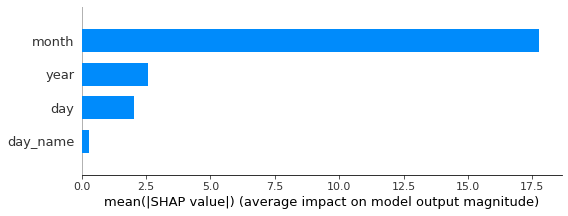

In [ ]:
shap.summary_plot(shap_values, X, plot_type="bar")

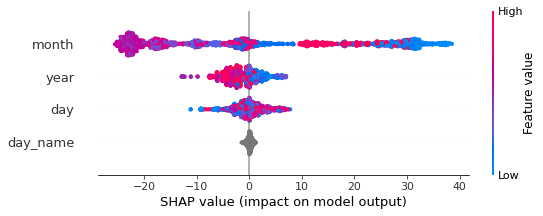

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X)

In [ ]:
explainer.shap_values(X)

array([[  2.96707727, -19.15962185,   0.03333215,   0.20199595],
       [  2.929749  , -19.20985169,   0.36923018,   0.39791522],
       [  3.43338693, -22.20933558,  -2.06425941,  -0.44348761],
       ...,
       [  0.94566936,  25.34504525,  -3.32407445,   0.41919426],
       [  0.96581668,  25.44975899,  -3.6327142 ,   0.60297294],
       [  0.9456786 ,  26.8582535 ,  -2.80459491,   0.68344177]])

In [ ]:
def case_detail(case_data):
    '''
    format obj returned from shap.force_plot()
    '''
    de=pd.DataFrame(case_data.data['features'])
    fcols=[]
    for i in case_data.data['features'].keys():
        fcols.append(case_data.data['featureNames'][i])
    de.columns=fcols
    return de

def individual_case_plot(explainer, X, case_index):
    """
    >>> individual_case_plot(explainer, X_train, 1)
    """
    shap_values = explainer.shap_values(X.iloc[[case_index]])
    g=shap.plots.force(explainer.expected_value, shap_values=shap_values, features=X.iloc[case_index, :],matplotlib=True)
    # print(g.__dict__)
    # shap_values = explainer.shap_values(X)
    # g=shap.force_plot(explainer.expected_value, shap_values=shap_values[case_index], features=X.iloc[case_index, :])
    # print('SHAP values')
    # dshap=pd.DataFrame(shap_values, columns=feature_cols)
    # dpos=dshap.iloc[case_index][dshap.iloc[case_index].values > 0].sort_values(ascending=False)
    # dneg=dshap.iloc[case_index][dshap.iloc[case_index].values < 0].sort_values(ascending=False)
    # print(dpos)
    # print(f'sum pos = {dpos.sum():.6f}')
    # print(dneg)
    # print(f'sum neg = {dneg.sum():.6f}')

    # print(f'sum SHAP = {dpos.sum()+dneg.sum():.6f}')
    # print(f'base      value = {explainer.expected_value:.2f}')
    # print(f'predicted value = {explainer.expected_value + dpos.sum() + dneg.sum():.2f}')
    # print(g.data)
    return g

In [ ]:
X[:3]

,year,month,day,day_name
date,,,,
2016-07-30,2016,7,30,Saturday
2016-07-31,2016,7,31,Sunday
2016-08-01,2016,8,1,Monday


In [ ]:
X.iloc[[3]]

,year,month,day,day_name
date,,,,
2016-08-02,2016,8,2,Tuesday


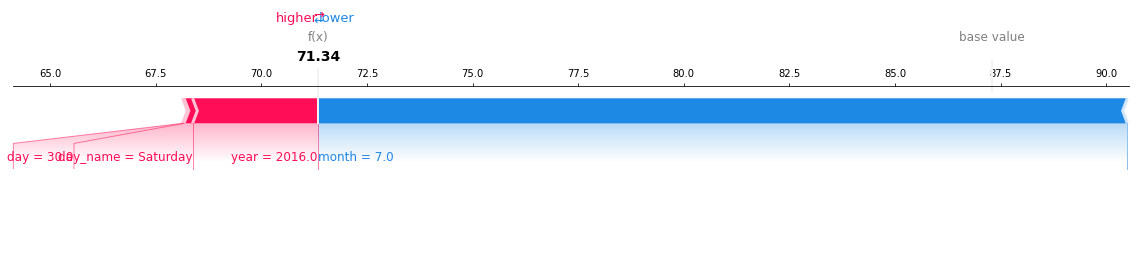

In [ ]:
#initjs()


individual_case_plot(explainer, X, 0 )

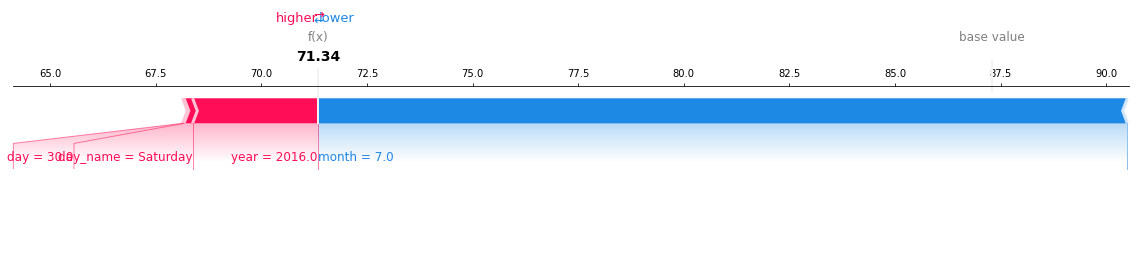

In [ ]:
g=individual_case_plot(explainer, X, 0)

In [ ]:
df=data[['date', y_col]]
df.columns=['ds', 'y']
df

,ds,y
0,2016-07-30,61.0
1,2016-07-31,68.0
2,2016-08-01,60.0
3,2016-08-02,68.0
4,2016-08-03,70.0
...,...,...
2391,2023-02-24,159.0
2392,2023-02-25,138.0
2393,2023-02-26,110.0
2394,2023-02-27,127.0


In [ ]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df_trend.head()

,date,pm25,pm10,o3,no2,so2,co
0,2016-07-30,61.0,19.0,17.0,15.0,8.0,6.0
1,2016-07-31,68.0,24.0,25.0,13.0,7.0,6.0
2,2016-08-01,60.0,20.0,26.0,14.0,2.0,6.0
3,2016-08-02,68.0,25.0,21.0,14.0,7.0,6.0
4,2016-08-03,70.0,26.0,23.0,16.0,2.0,6.0


In [ ]:
result = seasonal_decompose(df_trend[y_col],model='multiplicable',period=365)

<AxesSubplot:>

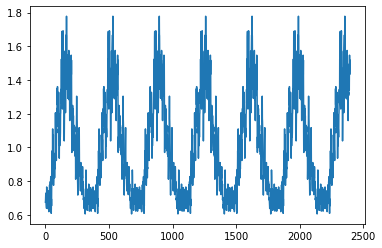

In [ ]:
result.seasonal.plot()

<AxesSubplot:>

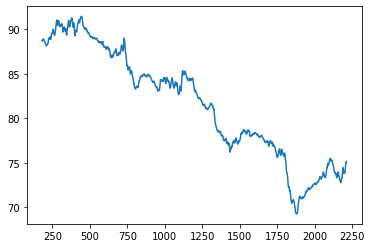

In [ ]:
result.trend.plot()

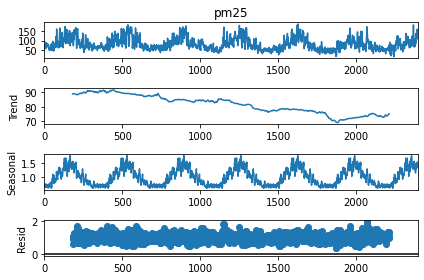

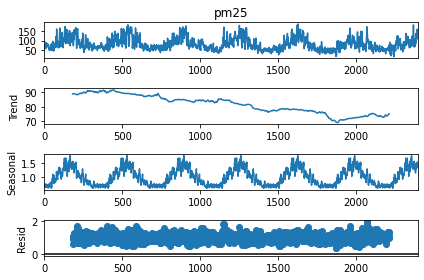

In [ ]:
result.plot()

In [ ]:
def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
       _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
         "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
          )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version


<AxesSubplot:title={'center':'Periodogram'}, ylabel='Variance'>

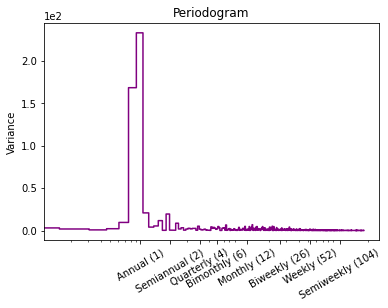

In [ ]:
plot_periodogram(df_trend[y_col])